# k-Nearest Neighbors 

# Similarity and Distance Measures

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

sentence1 = "This is the first sentence in English."
sentence2 = "Another sentence also in English."
sentence3 = "This is not a sentence."

documents = [sentence1 , sentence2 , sentence3]
cV = CountVectorizer() # count how often each word appears

doc_term_matrix = cV.fit_transform(documents).todense()

In [2]:
doc_term_matrix

matrix([[0, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 0, 1]])

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

# convert matrix to numpy
doc_term_matrix = np.asarray(doc_term_matrix)

cosine_similarity(doc_term_matrix)

array([[1.        , 0.50709255, 0.56694671],
       [0.50709255, 1.        , 0.2236068 ],
       [0.56694671, 0.2236068 , 1.        ]])

In [4]:
from sklearn.metrics import pairwise_distances
for m in ['manhattan','euclidean']:
    print(m)
    print(pairwise_distances(doc_term_matrix, metric=m))

manhattan
[[0. 6. 5.]
 [6. 0. 7.]
 [5. 7. 0.]]
euclidean
[[0.         2.44948974 2.23606798]
 [2.44948974 0.         2.64575131]
 [2.23606798 2.64575131 0.        ]]


# kNN for Iris Flowers

In [5]:
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
    
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features to make it more challenging 
X = iris.data[:, :2]
y = iris.target

# Standard-scalar of the features
# (in this case, maybe not really necessary)
from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

# create an instance of Neighbor Classifier and fit the data
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)
accuracy_score(y, clf.predict(X))

0.8066666666666666

In [6]:
# --->>> Your Turn <<<---
# Experiment with different settings for the parameters:
#  - n_neighbors
#  - weights 
#  - algorithm
#  - leaf_size
# (see: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
# What do you observe?

In [7]:
# See https://shubh-tripathi.medium.com/knn-7be936cea811
# leaf_size helps computing time
# Algorithm helps with large datasets
# weights helps against underfitting with large k
import pandas as pd

df = pd.DataFrame(columns=['accuracy','neighbors','weights','metric'])

n_neighbors = range(1,151)
weights = ['uniform','distance']
metric = ['manhattan','euclidean']

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features to make it more challenging 
X = iris.data[:, :2]
y = iris.target

# We scan all the parameters.
# This is only doable because it is a small dataset
accuracy = []
for w in weights:
    for n in n_neighbors:
        for m in metric:
            # create an instance of Neighbors Classifier and fit the data
            clf = neighbors.KNeighborsClassifier(n_neighbors=n, weights=w, metric=m)
            clf.fit(X, y)
            accuracy_score(y, clf.predict(X))
            accuracy.append(accuracy_score(y, clf.predict(X)))
            df.loc[len(df)] = [accuracy_score(y, clf.predict(X)), n, w, m]
print(df)

     accuracy  neighbors   weights     metric
0    0.920000          1   uniform  manhattan
1    0.920000          1   uniform  euclidean
2    0.846667          2   uniform  manhattan
3    0.846667          2   uniform  euclidean
4    0.840000          3   uniform  manhattan
..        ...        ...       ...        ...
595  0.926667        148  distance  euclidean
596  0.926667        149  distance  manhattan
597  0.926667        149  distance  euclidean
598  0.926667        150  distance  manhattan
599  0.926667        150  distance  euclidean

[600 rows x 4 columns]


<Axes: xlabel='neighbors', ylabel='accuracy'>

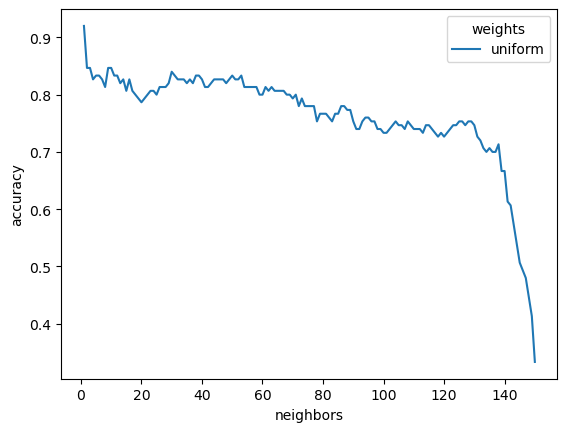

In [8]:
import seaborn as sns
sns.lineplot(df.query('weights=="uniform" and metric=="euclidean"'), x='neighbors', y='accuracy', hue='weights')

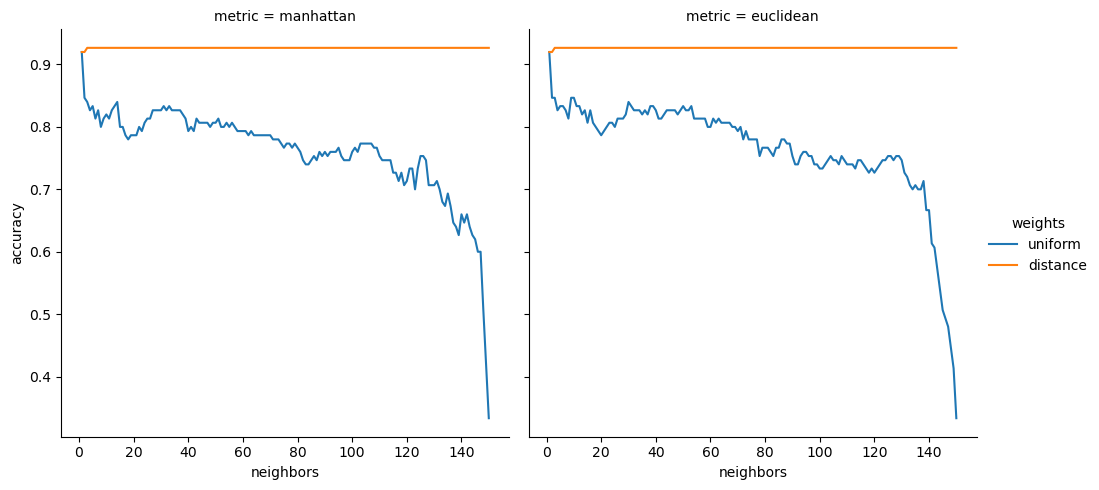

In [9]:
# algorithm only helps in case of large datasets to quicker find the nearest neighbors
sns.relplot(
    data=df, x="neighbors", y="accuracy",
    col="metric", hue='weights',
    kind="line"
)

In [10]:
# See https://shubh-tripathi.medium.com/knn-7be936cea811
# leaf_size helps computing time
# Algorithm helps with large datasets
# weights helps against underfitting with large k
import pandas as pd

df = pd.DataFrame(columns=['accuracy','neighbors','algorithm','leaf_size'])

n_neighbors = range(1,151)
algorithms = ['ball_tree', 'kd_tree', 'brute']
leaf_size = range(10,41)

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features to make it more challenging 
X = iris.data[:, :2]
y = iris.target

# create an instance of Neighbors Classifier and fit the data
# I scan through all the parameters. This is only doable because it is a small dataset
accuracy = []
for n in n_neighbors:
    for a in algorithms:
        for l in leaf_size:
            clf = neighbors.KNeighborsClassifier(n_neighbors=n, leaf_size=l, algorithm=a)
            clf.fit(X, y)
            accuracy_score(y, clf.predict(X))
            accuracy.append(accuracy_score(y, clf.predict(X)))
            df.loc[len(df)] = [accuracy_score(y, clf.predict(X)), n, a, l]
print(df)

       accuracy  neighbors  algorithm  leaf_size
0      0.926667          1  ball_tree         10
1      0.926667          1  ball_tree         11
2      0.926667          1  ball_tree         12
3      0.926667          1  ball_tree         13
4      0.926667          1  ball_tree         14
...         ...        ...        ...        ...
13945  0.333333        150      brute         36
13946  0.333333        150      brute         37
13947  0.333333        150      brute         38
13948  0.333333        150      brute         39
13949  0.333333        150      brute         40

[13950 rows x 4 columns]


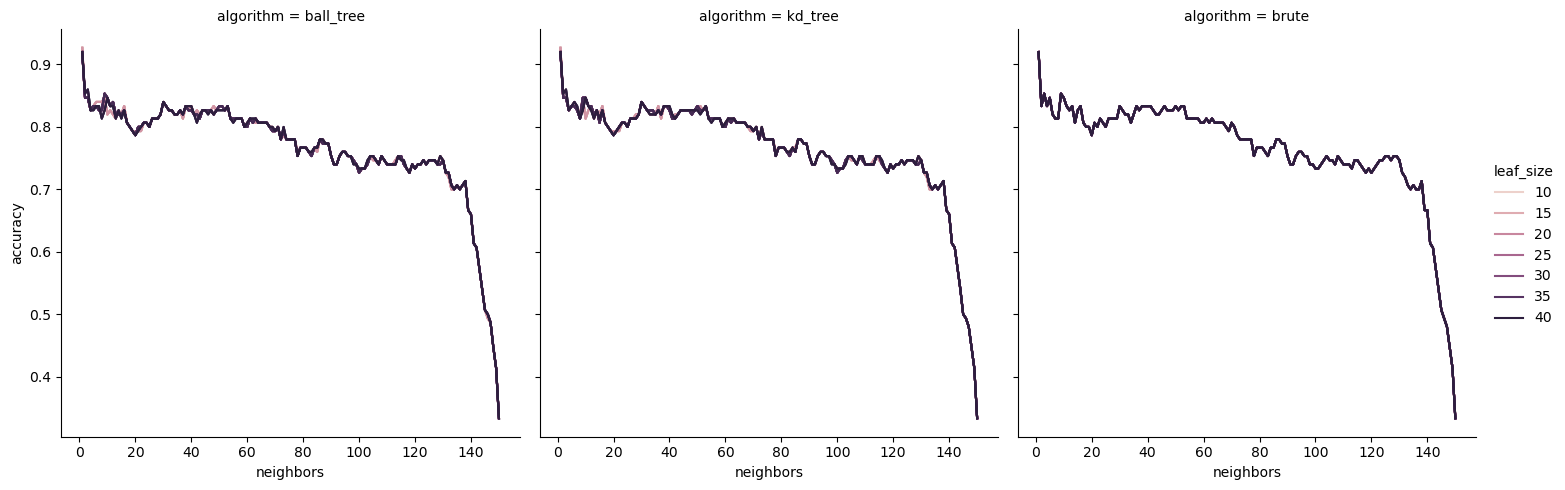

In [11]:
# algorithm and leaf_size only helps in cases of large datasets
# to quicker find the nearest neighbors (search optimization)
# small leaf_size leads to small errors
sns.relplot(
    data=df, x="neighbors", y="accuracy",
    col="algorithm", hue='leaf_size',
    kind="line"
)

In [12]:
# --->>> Your Turn <<<---
# Use radius-neighbors instead of k-nearest-neighbors

import pandas as pd

df = pd.DataFrame(columns=['accuracy','radius','weights','metric'])

radius = np.arange(0.1,2.1,0.1)
weights = ['uniform','distance']
metric = ['manhattan','euclidean','cosine','hamming','haversine','chebyshev']

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features to make it more challenging 
X = iris.data[:, :2]
y = iris.target

# We scan all the parameters.
# This is only doable because it is a small dataset
accuracy = []
for w in weights:
    for r in radius:
        for m in metric:
            # create an instance of Neighbors Classifier and fit the data
            clf = neighbors.RadiusNeighborsClassifier(radius=r, weights=w, metric=m)
            clf.fit(X, y)
            accuracy_score(y, clf.predict(X))
            accuracy.append(accuracy_score(y, clf.predict(X)))
            df.loc[len(df)] = [accuracy_score(y, clf.predict(X)), r, w, m]
print(df)

     accuracy  radius   weights     metric
0    0.886667     0.1   uniform  manhattan
1    0.886667     0.1   uniform  euclidean
2    0.333333     0.1   uniform     cosine
3    0.926667     0.1   uniform    hamming
4    0.866667     0.1   uniform  haversine
..        ...     ...       ...        ...
235  0.926667     2.0  distance  euclidean
236  0.926667     2.0  distance     cosine
237  0.926667     2.0  distance    hamming
238  0.926667     2.0  distance  haversine
239  0.926667     2.0  distance  chebyshev

[240 rows x 4 columns]


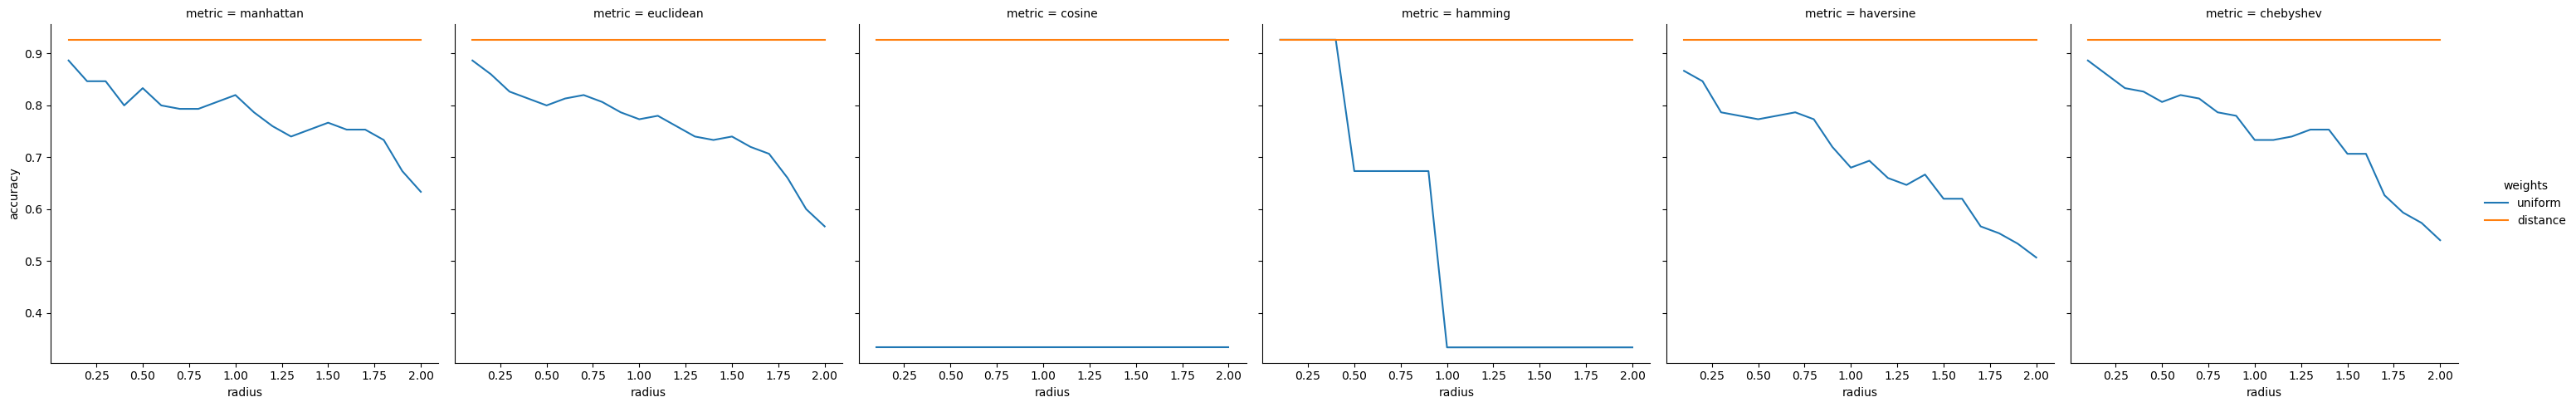

In [13]:
# it is interesting to see that radius-neighbors is a lot faster than k-nearest-neighbors
# with the distance weight the radius does not matter much as further away points have less influence
# hamming distance does not make much sense for this dataset
sns.relplot(
    data=df, x="radius", y="accuracy",
    col="metric", hue='weights',
    kind="line"
)


In [14]:
# --->>> Your Turn <<<---
# What do you think about the generalsiation ability of the k-nearest-neighbors algorithm?

# It memorizes, but does not generalize
# kNN does not have a training step (only storing of information)!
# kNN has a big problem with the curse of dimensionality!